# Connect to RDS

In [29]:
!pip3 install pymysql==0.9.3

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [141]:
import pymysql
import boto3
import pandas as pd
import numpy as np
import s3fs
import locale
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
connection = pymysql.connect( 'database-1.cbrnhoat32p7.us-east-1.rds.amazonaws.com', 'myuser', 'myPass05')
cursor = connection.cursor()
print(cursor)

In [143]:
cursor.execute("select version()")

1

In [144]:
data = cursor.fetchone()

In [145]:
data

('8.0.28',)

In [146]:
sql = '''select database collections'''


In [147]:
cursor.connection.commit()

In [148]:
sql = '''use collections''' 
cursor.execute(sql)

0

In [149]:
#show the tables in RDs
sql = '''
show tables
'''
cursor.execute(sql)


1

In [150]:
cursor.fetchall()

(('items',),)

In [151]:
sql = '''select * from collections.items'''
cursor.execute(sql)
df = pd.read_sql_query(sql, connection)
df.head()

/usr/local/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Title,Image,Rating,ProdLink,TotalReviews,Price,OrgPrice,CouponsDesc,CouponsSummery,CouponPrice
0,Cats vs Pickles - Limited Edition Holiday 12pk...,https://m.media-amazon.com/images/I/51n8ENJFUW...,4.7 out of 5 stars,https://www.amazon.com/gp/slredirect/picassoRe...,282.0,54.99,59.99,None,None,54.990
1,Osmo - Super Studio Disney Frozen 2 - Ages 5-1...,https://m.media-amazon.com/images/I/91SJQup1fq...,4.7 out of 5 stars,https://www.amazon.com/gp/slredirect/picassoRe...,4333.0,29.99,29.99,None,None,29.990
2,Pop it Pink Ombre Cupcake Fidget Toy Girls and...,https://m.media-amazon.com/images/I/81G2b5S-wQ...,5.0 out of 5 stars,https://www.amazon.com/gp/slredirect/picassoRe...,1.0,7.99,7.99,None,None,7.990
3,"Jasonwell Splash Pad Sprinkler for Kids 68"" Sp...",https://m.media-amazon.com/images/I/81s0fdVXUu...,4.4 out of 5 stars,https://www.amazon.com/Jasonwell-Sprinkle-Spri...,11005.0,19.99,38.99,10% coupon applied at checkoutSave 10% with c...,Save 10%,17.991
4,Magnetic Tiles Toys for 3 4 5 6 7 8+ Year Old ...,https://m.media-amazon.com/images/I/71DQtErS2T...,4.6 out of 5 stars,https://www.amazon.com/Magnetic-Building-Creat...,1991.0,25.97,35.99,20% coupon applied at checkoutSave 20% with c...,Save 20%,20.776


In [183]:
df['PercentReduction'] = df.apply(lambda row: abs(((row.CouponPrice - row.OrgPrice)/row.OrgPrice) * 100), axis=1)
df.head(10)

,Title,Image,Rating,ProdLink,TotalReviews,Price,OrgPrice,CouponsDesc,CouponsSummery,CouponPrice,PercentReduction
51,TEMI 8 Channels 2.4G Remote Control Dinosaur T...,https://m.media-amazon.com/images/I/71CfgcPxmT...,4.4 out of 5 stars,https://www.amazon.com/TEMI-Electronic-Educati...,4809.0,39.99,89.90,$6.00 coupon applied at checkoutSave $6.00 wi...,Save $6.00,33.9900,62.191324
79,Baby Toys 6 to 12 Months Touch & Go Musical Li...,https://m.media-amazon.com/images/I/71QyNYo+-v...,4.5 out of 5 stars,https://www.amazon.com/Dinosaur-Electronic-Cra...,2653.0,18.69,44.99,None,None,18.6900,58.457435
3,"Jasonwell Splash Pad Sprinkler for Kids 68"" Sp...",https://m.media-amazon.com/images/I/81s0fdVXUu...,4.4 out of 5 stars,https://www.amazon.com/Jasonwell-Sprinkle-Spri...,11005.0,19.99,38.99,10% coupon applied at checkoutSave 10% with c...,Save 10%,17.9910,53.857399
10,"HOLA Baby Toys 6 to 12 Months, Baby Rattles Ac...",https://m.media-amazon.com/images/I/61wtIWS4Ql...,4.8 out of 5 stars,https://www.amazon.com/HOLA-Rattles-Activity-C...,1035.0,14.97,29.99,1 Count (Pack of 1),Save 5%,14.2215,52.579193
24,"Bravokids Toys for 3-6 Years Old Girls Boys, L...",https://m.media-amazon.com/images/I/61Sz5N89C4...,4.5 out of 5 stars,https://www.amazon.com/Bravokids-Writing-Elect...,19023.0,22.99,29.99,37% coupon applied at checkoutSave 37% with c...,Save 37%,14.4837,51.704902
47,"LUKAT Splash Pad for Kids, Inflatable Sprinkle...",https://m.media-amazon.com/images/I/81aaiIEuoC...,4.2 out of 5 stars,https://www.amazon.com/gp/slredirect/picassoRe...,118.0,26.69,32.99,40% coupon applied at checkoutSave 40% with c...,Save 40%,16.0140,51.458018
97,"RenFox Musical Piano Mat, Toddlers Music Floor...",https://m.media-amazon.com/images/I/71iUFRjFre...,4.4 out of 5 stars,https://www.amazon.com/RenFox-Electronic-Diffe...,3147.0,16.99,25.99,$4.00 coupon applied at checkoutSave $4.00 wi...,Save $4.00,12.9900,50.019238
124,"RenFox Musical Piano Mat, Toddlers Music Floor...",https://m.media-amazon.com/images/I/71iUFRjFre...,4.4 out of 5 stars,https://www.amazon.com/RenFox-Electronic-Diffe...,3147.0,16.99,25.99,$4.00 coupon applied at checkoutSave $4.00 wi...,Save $4.00,12.9900,50.019238
6,"Toys for 3-8 Year Old Girls,Timer Rotation Sta...",https://m.media-amazon.com/images/I/61EWOPFU2f...,4.4 out of 5 stars,https://www.amazon.com/Projection-Christmas-Bi...,3388.0,25.98,39.99,20% coupon applied at checkoutSave 20% with c...,Save 20%,20.7840,48.027007
82,NARRIO Interactive Alphabet Wall Chart for Kid...,https://m.media-amazon.com/images/I/81AulVX+3q...,4.1 out of 5 stars,https://www.amazon.com/NARRIO-Educational-Inte...,1532.0,16.99,25.99,20% coupon applied at checkoutSave 20% with c...,Save 20%,13.5920,47.702963


In [153]:
df.columns

Index(['Title', 'Image', 'Rating', 'ProdLink', 'TotalReviews', 'Price',
       'OrgPrice', 'CouponsDesc', 'CouponsSummery', 'CouponPrice',
       'PercentReduction'],
      dtype='object')

In [154]:
# display top 10 deals in toys
df=df.sort_values(by='PercentReduction', ascending=False)
df.head(8)  

,Title,Image,Rating,ProdLink,TotalReviews,Price,OrgPrice,CouponsDesc,CouponsSummery,CouponPrice,PercentReduction
51,TEMI 8 Channels 2.4G Remote Control Dinosaur T...,https://m.media-amazon.com/images/I/71CfgcPxmT...,4.4 out of 5 stars,https://www.amazon.com/TEMI-Electronic-Educati...,4809.0,39.99,89.90,$6.00 coupon applied at checkoutSave $6.00 wi...,Save $6.00,33.9900,62.191324
79,Baby Toys 6 to 12 Months Touch & Go Musical Li...,https://m.media-amazon.com/images/I/71QyNYo+-v...,4.5 out of 5 stars,https://www.amazon.com/Dinosaur-Electronic-Cra...,2653.0,18.69,44.99,None,None,18.6900,58.457435
3,"Jasonwell Splash Pad Sprinkler for Kids 68"" Sp...",https://m.media-amazon.com/images/I/81s0fdVXUu...,4.4 out of 5 stars,https://www.amazon.com/Jasonwell-Sprinkle-Spri...,11005.0,19.99,38.99,10% coupon applied at checkoutSave 10% with c...,Save 10%,17.9910,53.857399
10,"HOLA Baby Toys 6 to 12 Months, Baby Rattles Ac...",https://m.media-amazon.com/images/I/61wtIWS4Ql...,4.8 out of 5 stars,https://www.amazon.com/HOLA-Rattles-Activity-C...,1035.0,14.97,29.99,1 Count (Pack of 1),Save 5%,14.2215,52.579193
24,"Bravokids Toys for 3-6 Years Old Girls Boys, L...",https://m.media-amazon.com/images/I/61Sz5N89C4...,4.5 out of 5 stars,https://www.amazon.com/Bravokids-Writing-Elect...,19023.0,22.99,29.99,37% coupon applied at checkoutSave 37% with c...,Save 37%,14.4837,51.704902
47,"LUKAT Splash Pad for Kids, Inflatable Sprinkle...",https://m.media-amazon.com/images/I/81aaiIEuoC...,4.2 out of 5 stars,https://www.amazon.com/gp/slredirect/picassoRe...,118.0,26.69,32.99,40% coupon applied at checkoutSave 40% with c...,Save 40%,16.0140,51.458018
97,"RenFox Musical Piano Mat, Toddlers Music Floor...",https://m.media-amazon.com/images/I/71iUFRjFre...,4.4 out of 5 stars,https://www.amazon.com/RenFox-Electronic-Diffe...,3147.0,16.99,25.99,$4.00 coupon applied at checkoutSave $4.00 wi...,Save $4.00,12.9900,50.019238
124,"RenFox Musical Piano Mat, Toddlers Music Floor...",https://m.media-amazon.com/images/I/71iUFRjFre...,4.4 out of 5 stars,https://www.amazon.com/RenFox-Electronic-Diffe...,3147.0,16.99,25.99,$4.00 coupon applied at checkoutSave $4.00 wi...,Save $4.00,12.9900,50.019238


In [80]:
#(100- (CouponPrice/OrgPrice*100)) percentage reduction


In [182]:
# Title, link, price
from IPython.display import HTML
df1=df[['Title','ProdLink','TotalReviews','CouponPrice','PercentReduction']]
df1.sort_values(by='PercentReduction', ascending=False)
df1.head(10)

,Title,ProdLink,TotalReviews,CouponPrice,PercentReduction
51,TEMI 8 Channels 2.4G Remote Control Dinosaur T...,https://www.amazon.com/TEMI-Electronic-Educati...,4809.0,33.9900,62.191324
79,Baby Toys 6 to 12 Months Touch & Go Musical Li...,https://www.amazon.com/Dinosaur-Electronic-Cra...,2653.0,18.6900,58.457435
3,"Jasonwell Splash Pad Sprinkler for Kids 68"" Sp...",https://www.amazon.com/Jasonwell-Sprinkle-Spri...,11005.0,17.9910,53.857399
10,"HOLA Baby Toys 6 to 12 Months, Baby Rattles Ac...",https://www.amazon.com/HOLA-Rattles-Activity-C...,1035.0,14.2215,52.579193
24,"Bravokids Toys for 3-6 Years Old Girls Boys, L...",https://www.amazon.com/Bravokids-Writing-Elect...,19023.0,14.4837,51.704902
47,"LUKAT Splash Pad for Kids, Inflatable Sprinkle...",https://www.amazon.com/gp/slredirect/picassoRe...,118.0,16.0140,51.458018
97,"RenFox Musical Piano Mat, Toddlers Music Floor...",https://www.amazon.com/RenFox-Electronic-Diffe...,3147.0,12.9900,50.019238
124,"RenFox Musical Piano Mat, Toddlers Music Floor...",https://www.amazon.com/RenFox-Electronic-Diffe...,3147.0,12.9900,50.019238
6,"Toys for 3-8 Year Old Girls,Timer Rotation Sta...",https://www.amazon.com/Projection-Christmas-Bi...,3388.0,20.7840,48.027007
82,NARRIO Interactive Alphabet Wall Chart for Kid...,https://www.amazon.com/NARRIO-Educational-Inte...,1532.0,13.5920,47.702963


In [173]:
from IPython.display import HTML
#pd.set_option('display.max_colwidth', 50)
#HTML(df1.head(10).to_html(render_links=True, escape=True,col_space='15px'))
HTML(df1.head(10).to_html(render_links=True))



,Title,ProdLink,TotalReviews,CouponPrice,PercentReduction
51,"TEMI 8 Channels 2.4G Remote Control Dinosaur Toys for Kids 3-5, Boys Girls 4-7 Years, Electric RC Toys Walking T- Rex with Lights and Sounds Powered by Rechargeable Battery, 360° Rotation Stunt",https://www.amazon.com/TEMI-Electronic-Educational-Tyrannosaurus-Rechargeable/dp/B07DGTSQ21/ref=sr_1_46?crid=23X2CHTW4649I&keywords=toys&qid=1651201775&refinements=p_72%3A1248963011&rnid=1248961011&s=toys-and-games&sprefix=toys%2Caps%2C170&sr=1-46,4809.0,33.9900,62.191324
79,"Baby Toys 6 to 12 Months Touch & Go Musical Light Infant Toys, Baby Crawling Toys 6 Month Old Baby Toys 12-18 Months, Tummy Time Toys for 1 Year Old Boy Gifts Girl Toy, Baby Toddler Boy Toys Age 1-2",https://www.amazon.com/Dinosaur-Electronic-Crawling-Development-Educational/dp/B082G4QRKL/ref=sr_1_57?crid=23X2CHTW4649I&keywords=toys&qid=1651201784&refinements=p_72%3A1248963011&rnid=1248961011&s=toys-and-games&sprefix=toys%2Caps%2C170&sr=1-57,2653.0,18.6900,58.457435
3,"Jasonwell Splash Pad Sprinkler for Kids 68"" Splash Play Mat Outdoor Water Toys Inflatable Splash Pad Baby Toddler Pool Boys Girls Children Outside Backyard Dog Sprinkler Pool for Age 1 2 3 4 5 6 7 8 9",https://www.amazon.com/Jasonwell-Sprinkle-Sprinkler-Toddlers-Children/dp/B07LG9CGF1/ref=sr_1_4?crid=23X2CHTW4649I&keywords=toys&qid=1651201763&refinements=p_72%3A1248963011&rnid=1248961011&s=toys-and-games&sprefix=toys%2Caps%2C170&sr=1-4,11005.0,17.9910,53.857399
10,"HOLA Baby Toys 6 to 12 Months, Baby Rattles Activity Ball, Shaker, Grab and Spin Rattle, Crawling Educational Toys for 3, 6, 9, 12 Months Baby Infant, Boys, Girls",https://www.amazon.com/HOLA-Rattles-Activity-Crawling-Educational/dp/B08KP4JFDM/ref=sr_1_12?crid=23X2CHTW4649I&keywords=toys&qid=1651201763&refinements=p_72%3A1248963011&rnid=1248961011&s=toys-and-games&sprefix=toys%2Caps%2C170&sr=1-12,1035.0,14.2215,52.579193
24,"Bravokids Toys for 3-6 Years Old Girls Boys, LCD Writing Tablet 10 Inch Doodle Board, Electronic Drawing Tablet Drawing Pads, Educational Birthday Gift for 3 4 5 6 7 8 Years Old Kids Toddler (Pink)",https://www.amazon.com/Bravokids-Writing-Electronic-Educational-Birthday/dp/B083BCTLP5/ref=sr_1_26?crid=23X2CHTW4649I&keywords=toys&qid=1651201763&refinements=p_72%3A1248963011&rnid=1248961011&s=toys-and-games&sprefix=toys%2Caps%2C170&sr=1-26,19023.0,14.4837,51.704902
47,"LUKAT Splash Pad for Kids, Inflatable Sprinkler Pad for Toddlers Kiddie Pool, Dolphin Water Play Mat for Outdoor Backyard, Wading Swimming Pool Water Toy Gift for 3 4 5 + Years Old Boys Girls",https://www.amazon.com/gp/slredirect/picassoRedirect.html/ref=pa_sp_mtf_toys-and-games_sr_pg2_1?ie=UTF8&adId=A02496073JTFNO1KR587F&qualifier=1651201775&id=8260669810008671&widgetName=sp_mtf&url=%2FLUKAT-Inflatable-Sprinkler-Toddlers-Swimming%2Fdp%2FB08T5NRV5X%2Fref%3Dsr_1_42_sspa%3Fcrid%3D23X2CHTW4649I%26keywords%3Dtoys%26qid%3D1651201775%26refinements%3Dp_72%253A1248963011%26rnid%3D1248961011%26s%3Dtoys-and-games%26sprefix%3Dtoys%252Caps%252C170%26sr%3D1-42-spons%26psc%3D1,118.0,16.0140,51.458018
97,"RenFox Musical Piano Mat, Toddlers Music Floor Keyboard Blanket Dance Mat with 8 Different Animal Sounds, Early Learning Educational Toys Gift for 1 2 3 4 Years Old Baby Boy Girl",https://www.amazon.com/RenFox-Electronic-Different-Education-Batteries/dp/B0863CGZ6Y/ref=sr_1_77?crid=23X2CHTW4649I&keywords=toys&qid=1651201791&refinements=p_72%3A1248963011&rnid=1248961011&s=toys-and-games&sprefix=toys%2Caps%2C170&sr=1-77,3147.0,12.9900,50.019238
124,"RenFox Musical Piano Mat, Toddlers Music Floor Keyboard Blanket Dance Mat with 8 Different Animal Sounds, Early Learning Educational Toys Gift for 1 2 3 4 Years Old Baby Boy Girl",https://www.amazon.com/RenFox-Electronic-Different-Education-Batteries/dp/B0863CGZ6Y/ref=sr_1_77?crid=23X2CHTW4649I&keywords=toys&qid=1651201791&refinements=p_72%3A1248963011&rnid=1248961011&s=toys-and-games&sprefix=toys%2Caps%2C170&sr=1-77,3147.0,12.9900,50.019238
6,"Toys for 3-8 Year Ol

In [157]:
import pandas as pd
import numpy as np
def make_clickable(val):
    #return f'<a target="_blank" href="{val}">{val}</a>'
    return '<a href="{}">{}</a>'.format(val,val)

#df1.style.format({'url':})
df1.style.format({'ProdLink': make_clickable})
#df1.style.set_properties(**{'text-align': 'center'})
#df1.to_html(render_links=True)
df1.head(10)

,Title,ProdLink,TotalReviews,CouponPrice,PercentReduction
51,TEMI 8 Channels 2.4G Remote Control Dinosaur T...,https://www.amazon.com/TEMI-Electronic-Educati...,4809.0,33.9900,62.191324
79,Baby Toys 6 to 12 Months Touch & Go Musical Li...,https://www.amazon.com/Dinosaur-Electronic-Cra...,2653.0,18.6900,58.457435
3,"Jasonwell Splash Pad Sprinkler for Kids 68"" Sp...",https://www.amazon.com/Jasonwell-Sprinkle-Spri...,11005.0,17.9910,53.857399
10,"HOLA Baby Toys 6 to 12 Months, Baby Rattles Ac...",https://www.amazon.com/HOLA-Rattles-Activity-C...,1035.0,14.2215,52.579193
24,"Bravokids Toys for 3-6 Years Old Girls Boys, L...",https://www.amazon.com/Bravokids-Writing-Elect...,19023.0,14.4837,51.704902
47,"LUKAT Splash Pad for Kids, Inflatable Sprinkle...",https://www.amazon.com/gp/slredirect/picassoRe...,118.0,16.0140,51.458018
97,"RenFox Musical Piano Mat, Toddlers Music Floor...",https://www.amazon.com/RenFox-Electronic-Diffe...,3147.0,12.9900,50.019238
124,"RenFox Musical Piano Mat, Toddlers Music Floor...",https://www.amazon.com/RenFox-Electronic-Diffe...,3147.0,12.9900,50.019238
6,"Toys for 3-8 Year Old Girls,Timer Rotation Sta...",https://www.amazon.com/Projection-Christmas-Bi...,3388.0,20.7840,48.027007
82,NARRIO Interactive Alphabet Wall Chart for Kid...,https://www.amazon.com/NARRIO-Educational-Inte...,1532.0,13.5920,47.702963


In [160]:
data=df1
data.shape

(147, 5)

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 51 to 146
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             147 non-null    object 
 1   ProdLink          147 non-null    object 
 2   TotalReviews      147 non-null    float64
 3   CouponPrice       147 non-null    float64
 4   PercentReduction  147 non-null    float64
dtypes: float64(3), object(2)
memory usage: 11.0+ KB


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

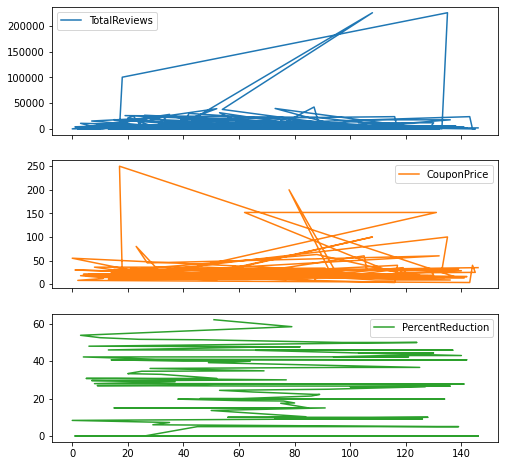

In [35]:
data.plot(subplots=True, figsize=(8, 8))

In [ ]:

df.plot.scatter(y='Rating', x='PercentProfit');